In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model

### Read files & submission file for template

In [44]:
path = 'data/'

X_train = pd.read_csv(path + 'X_train.csv',index_col='ROW_ID')
X_test = pd.read_csv(path + 'X_test.csv',index_col='ROW_ID')

y_train = pd.read_csv(path + 'y_train.csv',index_col='ROW_ID')
sample_submission = pd.read_csv(path + 'sample_submission.csv',index_col='ROW_ID')

In [45]:
data_explore = X_train.copy()
data_explore['TARGET'] = y_train['target']

Description générale

In [46]:
# Dimensions du jeu de données
print("\n=== Dimensions du jeu de données ===")
print(f"Nombre de lignes: {X_train.shape[0]}")
print(f"Nombre de colonnes: {X_train.shape[1]}")


# Types de colonnes
print("\n=== Types des colonnes ===")
print(X_train.dtypes)


=== Dimensions du jeu de données ===
Nombre de lignes: 180245
Nombre de colonnes: 43

=== Types des colonnes ===
TS                     object
ALLOCATION             object
RET_20                float64
RET_19                float64
RET_18                float64
RET_17                float64
RET_16                float64
RET_15                float64
RET_14                float64
RET_13                float64
RET_12                float64
RET_11                float64
RET_10                float64
RET_9                 float64
RET_8                 float64
RET_7                 float64
RET_6                 float64
RET_5                 float64
RET_4                 float64
RET_3                 float64
RET_2                 float64
RET_1                 float64
SIGNED_VOLUME_20      float64
SIGNED_VOLUME_19      float64
SIGNED_VOLUME_18      float64
SIGNED_VOLUME_17      float64
SIGNED_VOLUME_16      float64
SIGNED_VOLUME_15      float64
SIGNED_VOLUME_14      float64
SIGNED_VOLUME_13

In [47]:
RET_features = [f'RET_{i}' for i in range(1,21)]
SIGNED_VOLUME_features = [f'SIGNED_VOLUME_{i}' for i in range(1,21)]
TURNOVER_features = ['AVG_DAILY_TURNOVER']

RET_features_subset = []
for i in [3,5,10,15,20]:
    RET_features_subset.append(f'RET_{i}')

Test sur ALLOCATION 1 

In [26]:
allocation_1 = data_explore[data_explore['ALLOCATION'] == 'ALLOCATION_01'].reset_index(drop=True).drop(columns=['ALLOCATION', 'TS'])


allocation_1['category'] = allocation_1['TARGET'].apply(lambda x: 1 if x > 0 else 0)

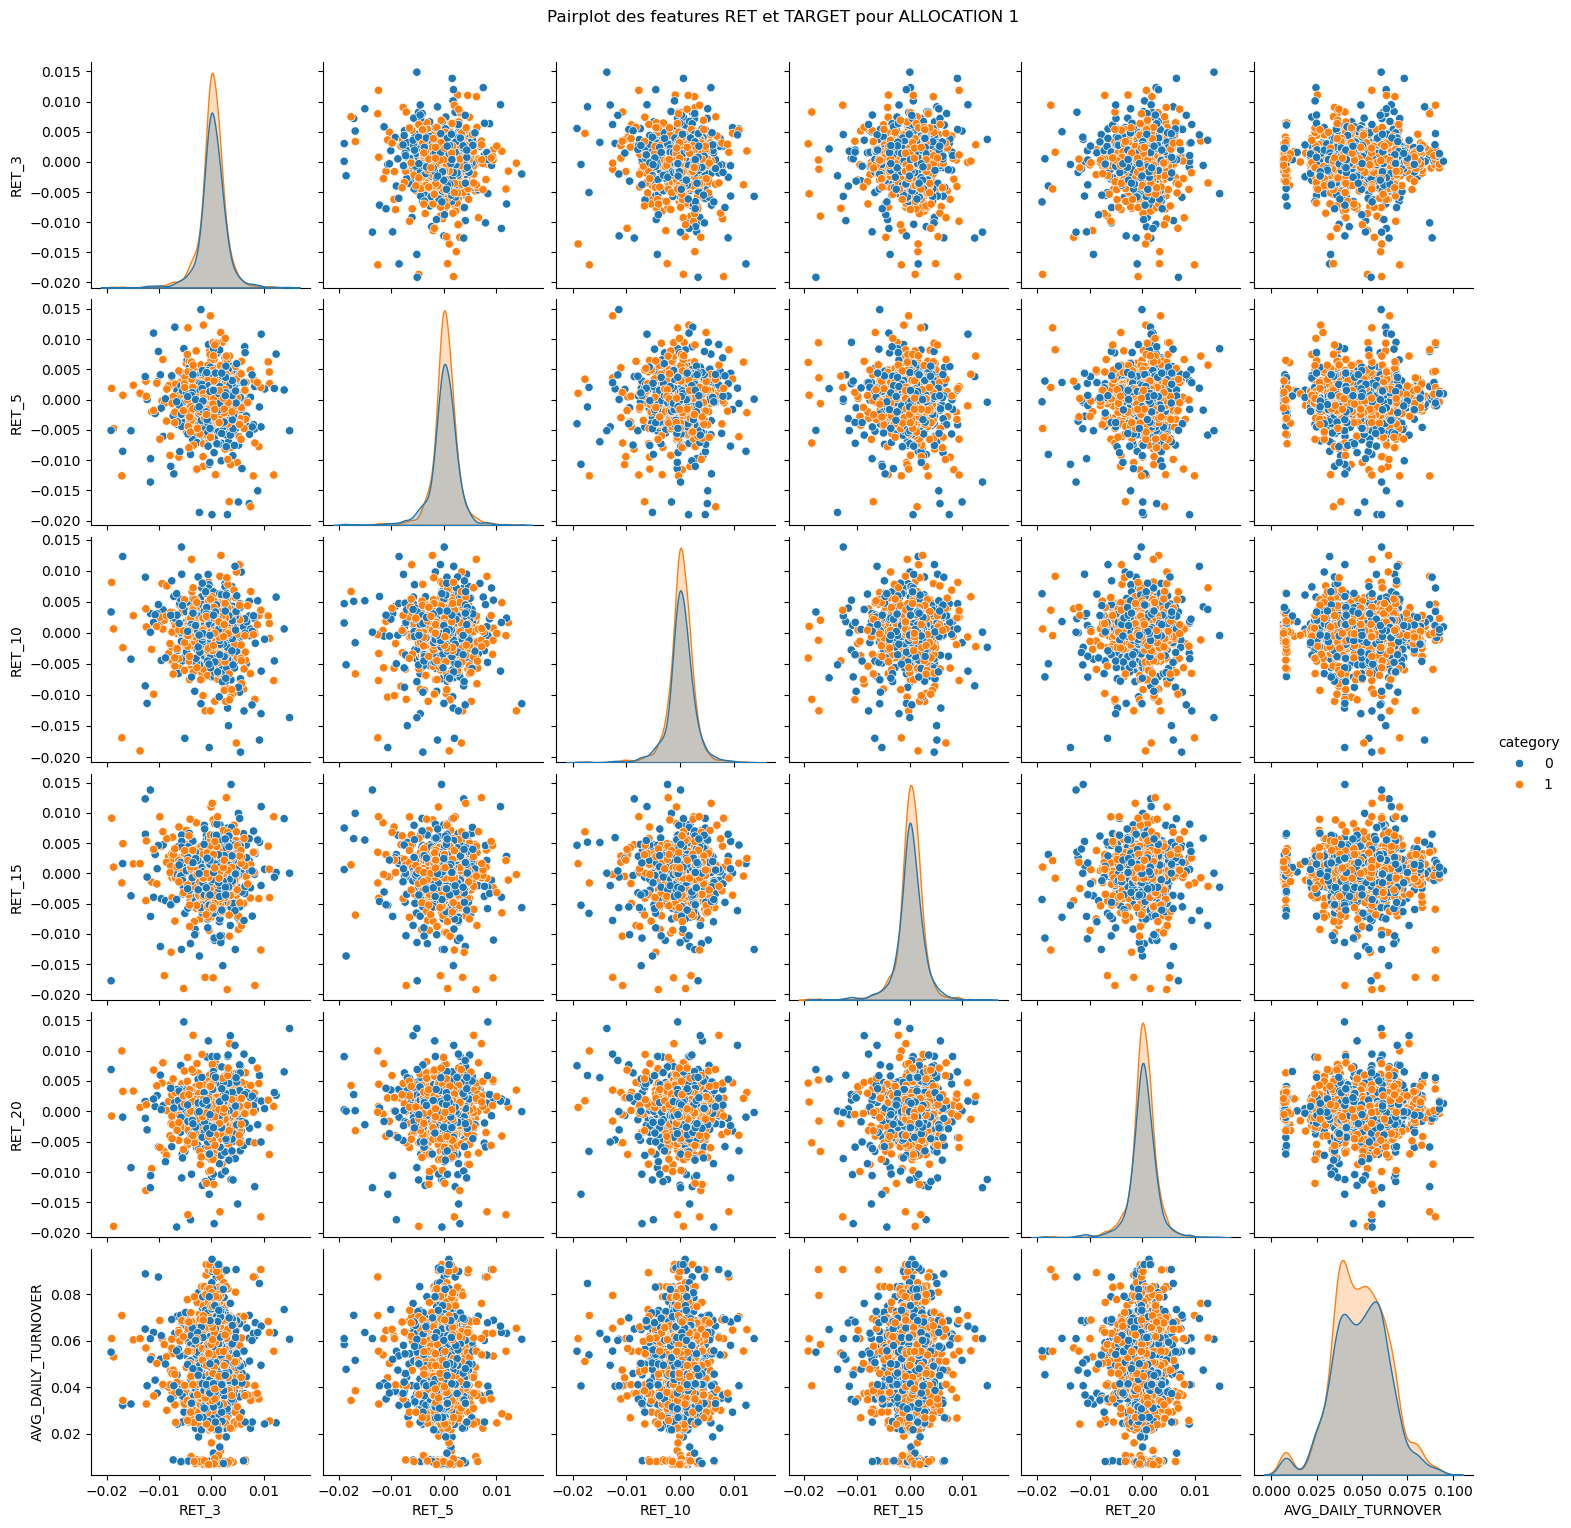

In [30]:
sns.pairplot(allocation_1[RET_features_subset + ['category'] + TURNOVER_features], hue='category', diag_kind='kde')
plt.suptitle('Pairplot des features RET et TARGET pour ALLOCATION 1', y=1.02)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Transformer en format long pour RET_i et SIGNED_VOLUME_i
ret_cols = [col for col in allocation_1.columns if col.startswith("RET_")]
vol_cols = [col for col in allocation_1.columns if col.startswith("SIGNED_VOLUME_")]


data_explore['ret_ts'] 

# Aperçu du format long
print("=== Données shrinkées (long format) ===")
print(data_long.head())

# Dimensions
print("\n=== Dimensions du jeu shrinké ===")
print(f"Nombre de lignes: {data_long.shape[0]}")
print(f"Nombre de colonnes: {data_long.shape[1]}")

# === Visualisations ===

# Évolution des retours par Allocation
plt.figure(figsize=(8,5))
for alloc, subset in data_long.groupby("ALLOCATION"):
    plt.plot(subset["Jour"], subset["RET"], marker="o", label=alloc)
plt.title("Évolution des RET par Allocation")
plt.xlabel("Jour")
plt.ylabel("RET")
plt.legend()
plt.show()

# Évolution des volumes signés par Allocation
plt.figure(figsize=(8,5))
for alloc, subset in data_long.groupby("ALLOCATION"):
    plt.plot(subset["Jour"], subset["SIGNED_VOLUME"], marker="o", label=alloc)
plt.title("Évolution des SIGNED_VOLUME par Allocation")
plt.xlabel("Jour")
plt.ylabel("SIGNED_VOLUME")
plt.legend()
plt.show()

=== Données shrinkées (long format) ===
          TS     ALLOCATION  AVG_DAILY_TURNOVER    TARGET  Jour       RET  \
0  DATE_0001  ALLOCATION_01            0.054324  0.000962    20 -0.002477   
1  DATE_0001  ALLOCATION_02            0.015669 -0.002046    20  0.006863   
2  DATE_0001  ALLOCATION_03            0.057961  0.001630    20 -0.005535   
3  DATE_0001  ALLOCATION_04            0.096004 -0.001154    20  0.003178   
4  DATE_0001  ALLOCATION_05            0.005816 -0.001860    20  0.003359   

   SIGNED_VOLUME  
0      -0.999115  
1       0.742508  
2      -0.940752  
3      -3.340217  
4       0.987042  

=== Dimensions du jeu shrinké ===
Nombre de lignes: 3604900
Nombre de colonnes: 7


KeyboardInterrupt: 

In [53]:
data_explore['ret_ts'] = data_explore[RET_features].values.tolist()

In [ ]:
data_explore['ret_ts'] = data_explore[RET_features].values.tolist()
plt.figure(figsize=(10,6))

for i in range(len(data_explore['ret_ts'])):
    plt.scatter(range(1, 21), data_explore['ret_ts'].iloc[i], marker='o', label=f'Row {i+1}')

plt.title("Scatter plot of RET features")
plt.xlabel("Feature Index")
plt.ylabel("RET Value")
plt.legend()
plt.show()

KeyboardInterrupt: 